In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
data = pd.read_csv('Spotify Most Streamed Songs.csv')
data.head()

track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  key   mode  \
0                147  141381703                  43  ...    B  Major   
1                 48  133716286                  48  ...   C#  Major   
2                113  140003974                  94  ...    F  Major   
3                100  800840817                 116  ...    A  Major   
4                 50  303236322                  84  ...    A  Minor   

   danceability_% valence_%  energy_% acousticness_% instrumentalness_%  \
0              80        89        83             31                  0   
1              71        61        74              7                  0   
2              51        32        53             17                  0   
3              55        58        72             11                  0   
4              65        23        80             14                 63   

   liveness_%  speechiness_%  \
0           8              4   
1          10              4   
2          31              6   
3          11             15   
4          11              6   

                                           cover_url  
0                                          Not Found  
1  https://i.scdn.co/image/ab67616d0000b2730656d5...  
2  https://i.scdn.co/image/ab67616d0000b273e85259...  
3  https://i.scdn.co/image/ab67616d0000b273e787cf...  
4  https://i.scdn.co/image/ab67616d0000b273ab5c9c...  

[5 rows x 25 columns]

In [3]:
data.shape

(953, 25)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [5]:
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')
data['in_deezer_playlists'] = pd.to_numeric(data['in_deezer_playlists'], errors='coerce')
data['in_shazam_charts'] = pd.to_numeric(data['in_shazam_charts'], errors='coerce')


In [6]:
data.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists     79
in_deezer_charts         0
in_shazam_charts        57
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
cover_url                0
dtype: int64

In [7]:
for i in data.select_dtypes(include = 'number').columns:
    data[i].fillna(data[i].mean(), inplace = True)

for i in data.select_dtypes(include = 'object').columns:
    data[i].fillna(data[i].mode()[0], inplace = True)

In [8]:
data.duplicated().sum()

0

In [9]:
data.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'cover_url'],
      dtype='object')

In [10]:
data.describe(include = 'number').T

count          mean           std     min          25%  \
artist_count          953.0  1.556139e+00  8.930442e-01     1.0          1.0   
released_year         953.0  2.018238e+03  1.111622e+01  1930.0       2020.0   
released_month        953.0  6.033578e+00  3.566435e+00     1.0          3.0   
released_day          953.0  1.393075e+01  9.201949e+00     1.0          6.0   
in_spotify_playlists  953.0  5.200125e+03  7.897609e+03    31.0        875.0   
in_spotify_charts     953.0  1.200944e+01  1.957599e+01     0.0          0.0   
streams               953.0  5.141374e+08  5.665592e+08  2762.0  141720999.0   
in_apple_playlists    953.0  6.781217e+01  8.644149e+01     0.0         13.0   
in_apple_charts       953.0  5.190871e+01  5.063024e+01     0.0          7.0   
in_deezer_playlists   953.0  1.097403e+02  1.712316e+02     0.0         13.0   
in_deezer_charts      953.0  2.666317e+00  6.035599e+00     0.0          0.0   
in_shazam_charts      953.0  5.117634e+01  1.226427e+02     0.0          0.0   
bpm                   953.0  1.225404e+02  2.805780e+01    65.0        100.0   
danceability_%        953.0  6.696957e+01  1.463061e+01    23.0         57.0   
valence_%             953.0  5.143127e+01  2.348063e+01     4.0         32.0   
energy_%              953.0  6.427912e+01  1.655053e+01     9.0         53.0   
acousticness_%        953.0  2.705771e+01  2.599608e+01     0.0          6.0   
instrumentalness_%    953.0  1.581322e+00  8.409800e+00     0.0          0.0   
liveness_%            953.0  1.821301e+01  1.371122e+01     3.0         10.0   
speechiness_%         953.0  1.013116e+01  9.912888e+00     2.0          4.0   

                              50%           75%           max  
artist_count                  1.0  2.000000e+00  8.000000e+00  
released_year              2022.0  2.022000e+03  2.023000e+03  
released_month                6.0  9.000000e+00  1.200000e+01  
released_day                 13.0  2.200000e+01  3.100000e+01  
in_spotify_playlists       2224.0  5.542000e+03  5.289800e+04  
in_spotify_charts             3.0  1.600000e+01  1.470000e+02  
streams               290833204.0  6.738011e+08  3.703895e+09  
in_apple_playlists           34.0  8.800000e+01  6.720000e+02  
in_apple_charts              38.0  8.700000e+01  2.750000e+02  
in_deezer_playlists          44.0  1.097403e+02  9.740000e+02  
in_deezer_charts              0.0  2.000000e+00  5.800000e+01  
in_shazam_charts              4.0  5.117634e+01  9.530000e+02  
bpm                         121.0  1.400000e+02  2.060000e+02  
danceability_%               69.0  7.800000e+01  9.600000e+01  
valence_%                    51.0  7.000000e+01  9.700000e+01  
energy_%                     66.0  7.700000e+01  9.700000e+01  
acousticness_%               18.0  4.300000e+01  9.700000e+01  
instrumentalness_%            0.0  0.000000e+00  9.100000e+01  
liveness_%                   12.0  2.400000e+01  9.700000e+01  
speechiness_%                 6.0  1.100000e+01  6.400000e+01

In [11]:
data.describe

<bound method NDFrame.describe of                               track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    float64
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      953 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   9

In [13]:
missing_values = data.isnull().sum()
print(missing_values)

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
cover_url               0
dtype: int64


In [14]:
print(missing_values[missing_values>0])

Series([], dtype: int64)


In [15]:
data_cleaned = data.dropna()

In [16]:
data_cleaned = data.dropna(axis=1)

In [17]:
from scipy import stats

# Calculate Z-scores of each value in the DataFrame
z_scores = stats.zscore(data.select_dtypes(include=['float64', 'int64']))

# Identify outliers (Z-score > 3 or < -3)
data_outliers = data[(z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)]
print(f'Number of outliers detected: {data_outliers.shape[0]}')

Number of outliers detected: 213


In [18]:
data_no_outliers = data[(z_scores < 3).all(axis=1) & (z_scores > -3).all(axis=1)]

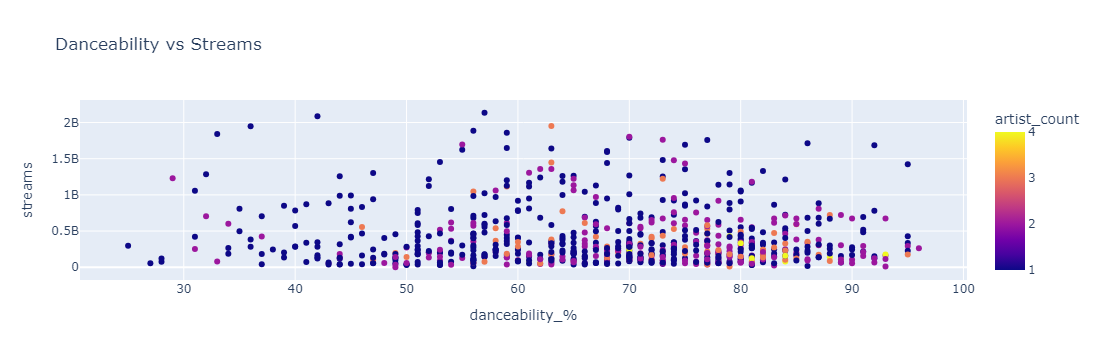

In [19]:
import plotly.express as px

# Scatter plot for danceability vs streams
fig2 = px.scatter(data_no_outliers, 
                  x='danceability_%', 
                  y='streams', 
                  color='artist_count',
                  hover_data=['track_name', 'artist(s)_name'],
                  title='Danceability vs Streams',
                  color_continuous_scale='Plasma')
fig2.show()

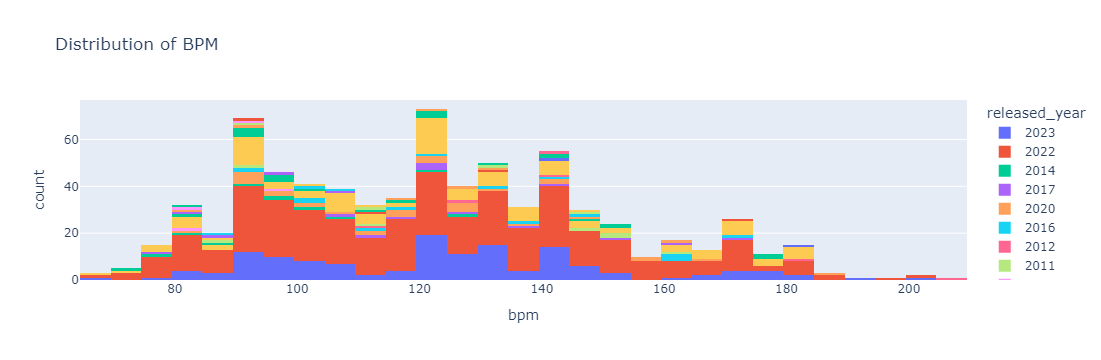

In [20]:
# Histogram for BPM distribution
fig3 = px.histogram(data_no_outliers, 
                    x='bpm', 
                    title='Distribution of BPM',
                    color='released_year',
                    color_discrete_sequence=px.colors.qualitative.Plotly)
fig3.show()

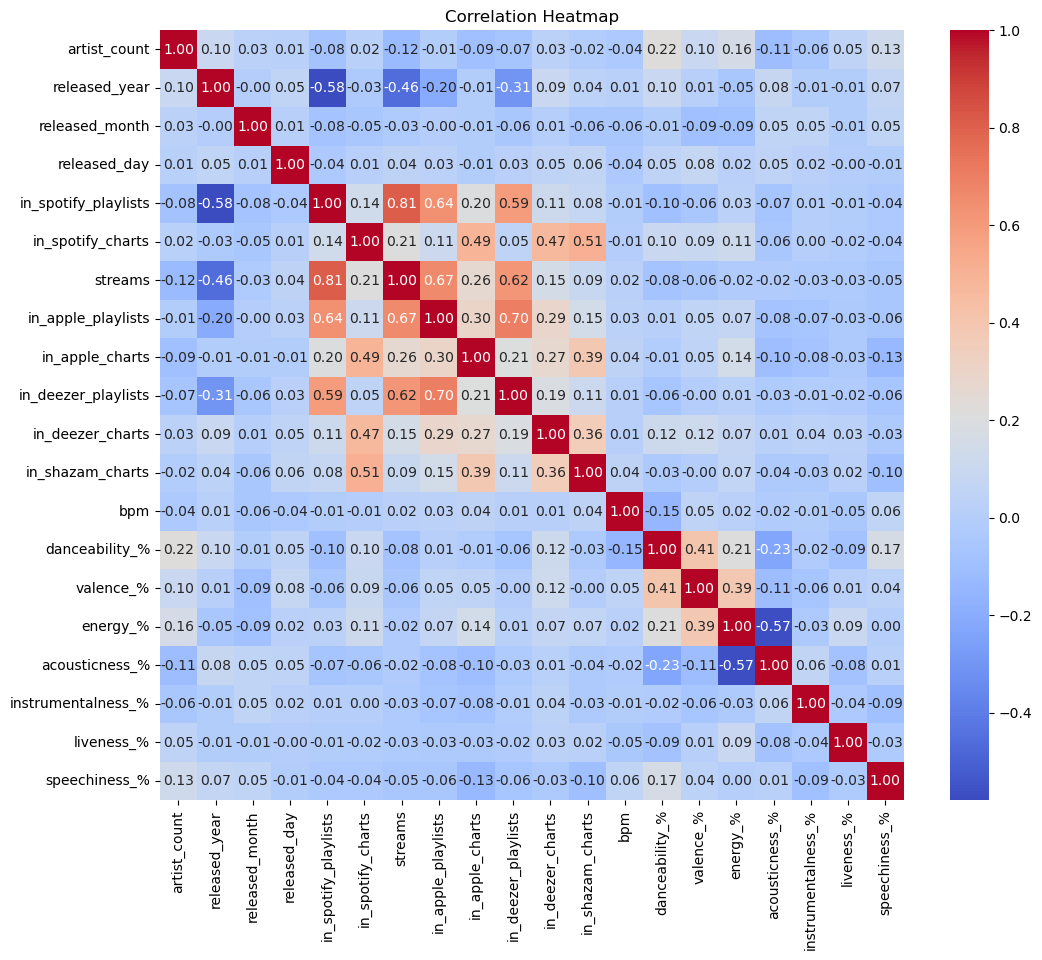

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = data_no_outliers.select_dtypes(include=['float64', 'int64']).corr()

# Create heatmap for correlation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

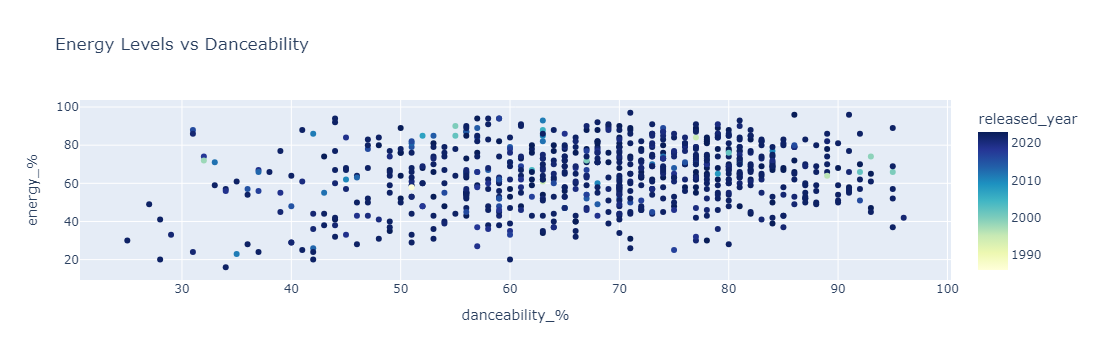

In [22]:
# Scatter plot for energy vs danceability
fig = px.scatter(data_no_outliers, 
                  x='danceability_%', 
                  y='energy_%', 
                  color='released_year', 
                  hover_data=['track_name', 'artist(s)_name'],
                  title='Energy Levels vs Danceability',
                  color_continuous_scale='YlGnBu')
fig.show()

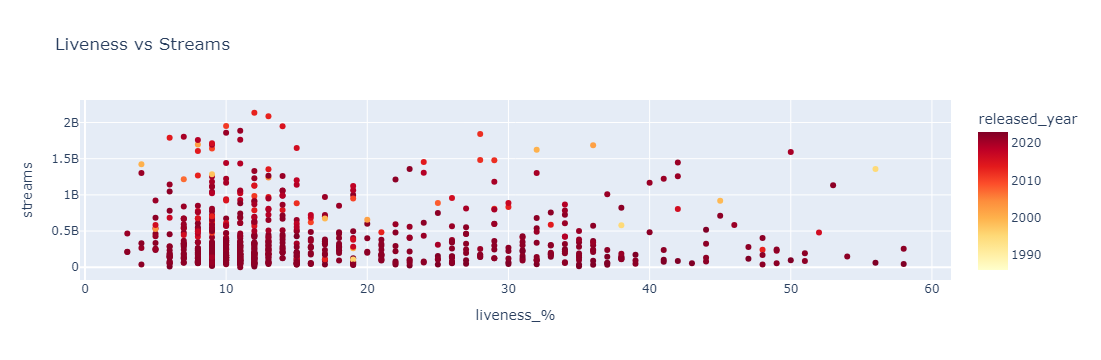

In [23]:
# Scatter plot for liveness vs streams
fig = px.scatter(data_no_outliers, 
                  x='liveness_%', 
                  y='streams', 
                  color='released_year',
                  hover_data=['track_name', 'artist(s)_name'],
                  title='Liveness vs Streams',
                  color_continuous_scale='YlOrRd')
fig.show()

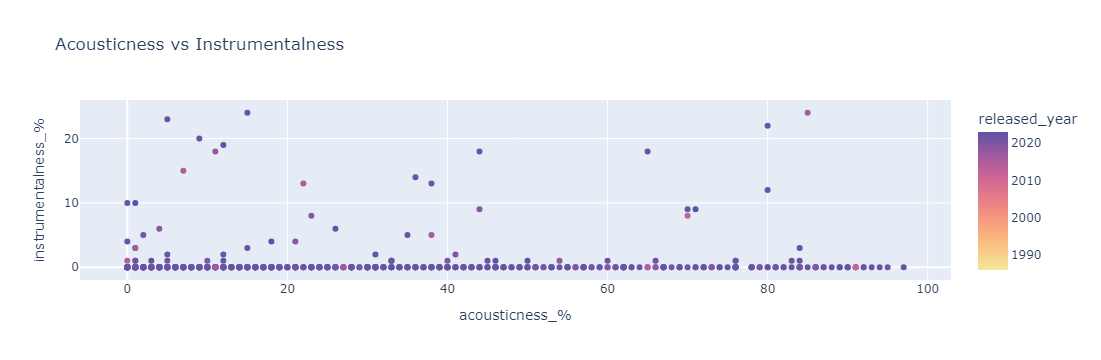

In [24]:
# Scatter plot for acousticness vs instrumentalness
fig = px.scatter(data_no_outliers, 
                  x='acousticness_%', 
                  y='instrumentalness_%', 
                  color='released_year', 
                  hover_data=['track_name', 'artist(s)_name'],
                  title='Acousticness vs Instrumentalness',
                  color_continuous_scale='Sunset')
fig.show()

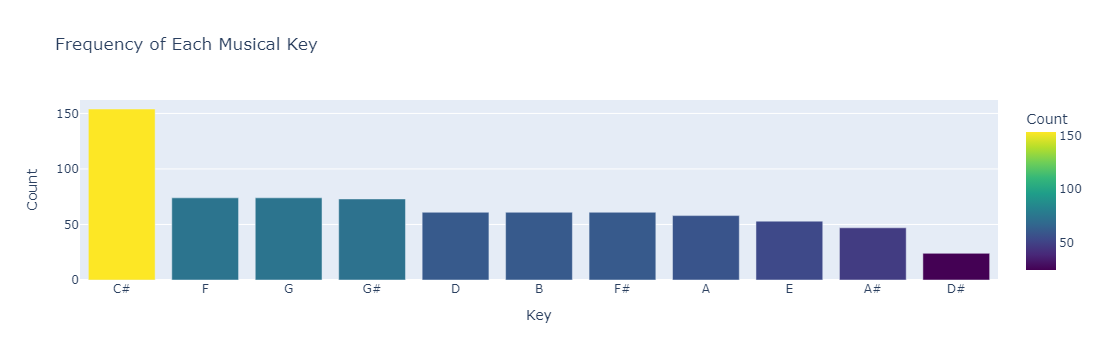

In [25]:
# Bar chart for the frequency of each key
key_counts = data_no_outliers['key'].value_counts().reset_index()
key_counts.columns = ['Key', 'Count']

fig = px.bar(key_counts, 
               x='Key', 
               y='Count', 
               title='Frequency of Each Musical Key',
               color='Count',
               color_continuous_scale='Viridis')
fig.show()


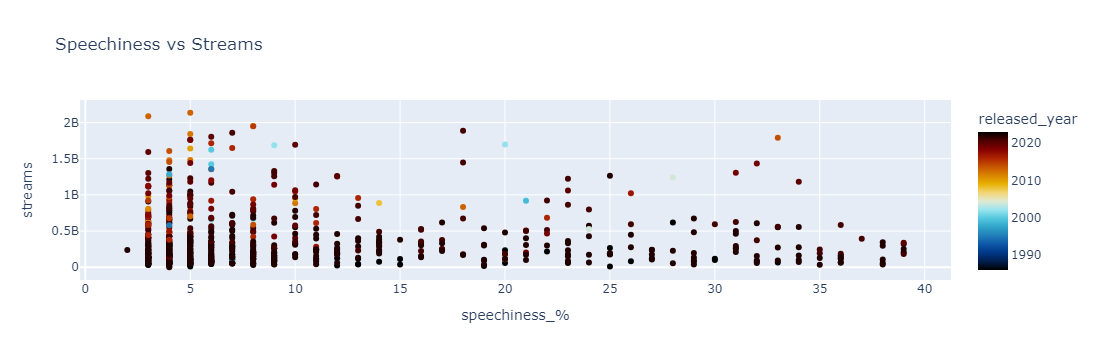

In [26]:
# Scatter plot for speechiness vs streams
fig = px.scatter(data_no_outliers, 
                  x='speechiness_%', 
                  y='streams', 
                  color='released_year',
                  hover_data=['track_name', 'artist(s)_name'],
                  title='Speechiness vs Streams',
                  color_continuous_scale='Icefire')
fig.show()

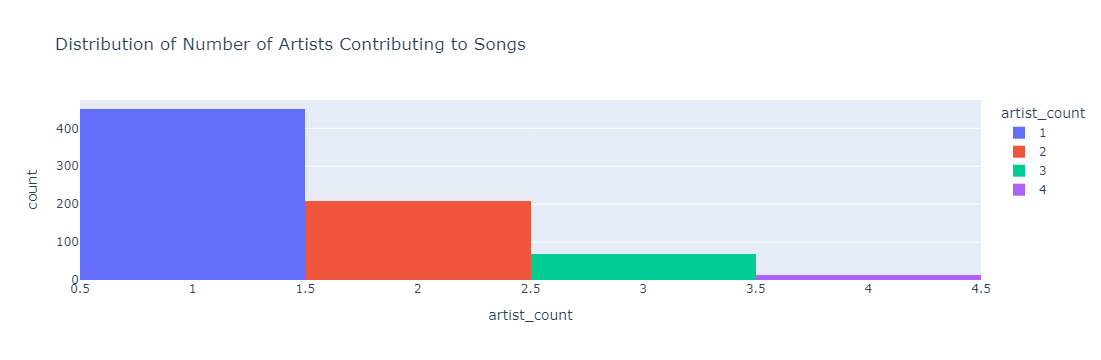

In [27]:
# Histogram for the distribution of artist count
fig = px.histogram(data_no_outliers, 
                   x='artist_count', 
                   title='Distribution of Number of Artists Contributing to Songs',
                   color='artist_count',
                   color_discrete_sequence=px.colors.qualitative.Plotly)
fig.show()